# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

Looking into problem statement and data, we can say that 'cnt' is our target(dependent variable) and rest of the fields are independent variables. 

We will build a model and do the evaluation of the model based the below steps:

Step 1: Reading and Understanding the Data

Step 2: Preprocessing of the Data

Step 3: Model building with the proprocess Data

Step 4: Residual Analysis of the Data

Step 5: Model Evaluation with Test Data

# Step 1: Reading and Understanding the Data

Let us first supress the warnings and import NumPy, Pandas, matplotlib and seborn. After that read the bike sharing day dataset

In [1]:
#supress the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Let's try to find out information about the dataset. See if there are some empty rows and also their data types of data columns.

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Looking into the result of the info() method, we can say that there are no empty columns in the bike dataset. 

All the data fields are either int and float data type except the 'dteday'. 

### We can see that there are some data fields (yr, mnth, weathersit, season, workingday, weekday and holiday) are binary or categorical. Let's visualize the number of categories in these fileds and there count with help of countplot. 

Using subplot to all the graphs in sigle plot. 

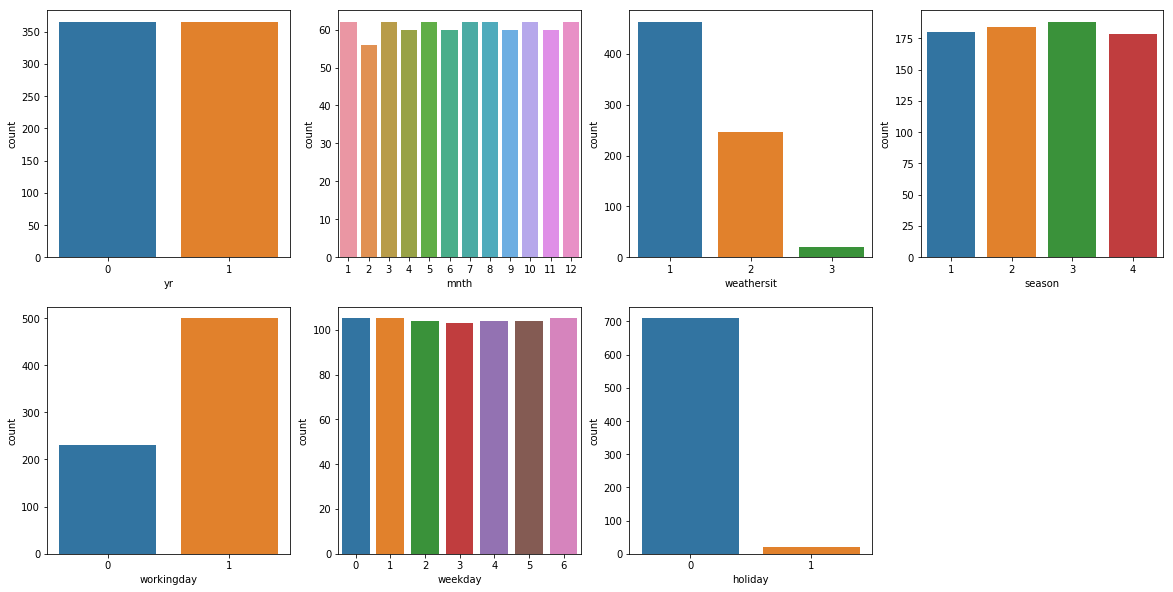

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.countplot(bike_df['yr'])
plt.subplot(2,4,2)
sns.countplot(bike_df['mnth'])
plt.subplot(2,4,3)
sns.countplot(bike_df['weathersit'])
plt.subplot(2,4,4)
sns.countplot(bike_df['season'])
plt.subplot(2,4,5)
sns.countplot(bike_df['workingday'])
plt.subplot(2,4,6)
sns.countplot(bike_df['weekday'])
plt.subplot(2,4,7)
sns.countplot(bike_df['holiday'])
plt.show()

From the above plot, we can conclude that the variables like mnth, season, weatersit and weekday are truely categorical variables.  

### Dropping some of the non-useful columns from the dataframe.

Our target variable is 'cnt'. The count of 'cnt' is equal to addition of 'causal' and 'registered' variables.So, we can ignore the 'casual' and 'registered' columns. 

The 'instant' variable is index, we can drop this variable as well.   

We already have derived variables(weekday, month, yr) from the date column 'dteday', so we can drop this columns as well.  

In [6]:
bike_df = bike_df.drop(['instant','dteday','casual', 'registered'], axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Applying some of the EDA techniques to analyze the data and relationships

####  Visualizing the relationship between numerical and target variable.

Let's draw a pair plot to visualize the relationship and get an inference that can we build a Linear regression model for the given dataset or not. 

<Figure size 864x720 with 0 Axes>

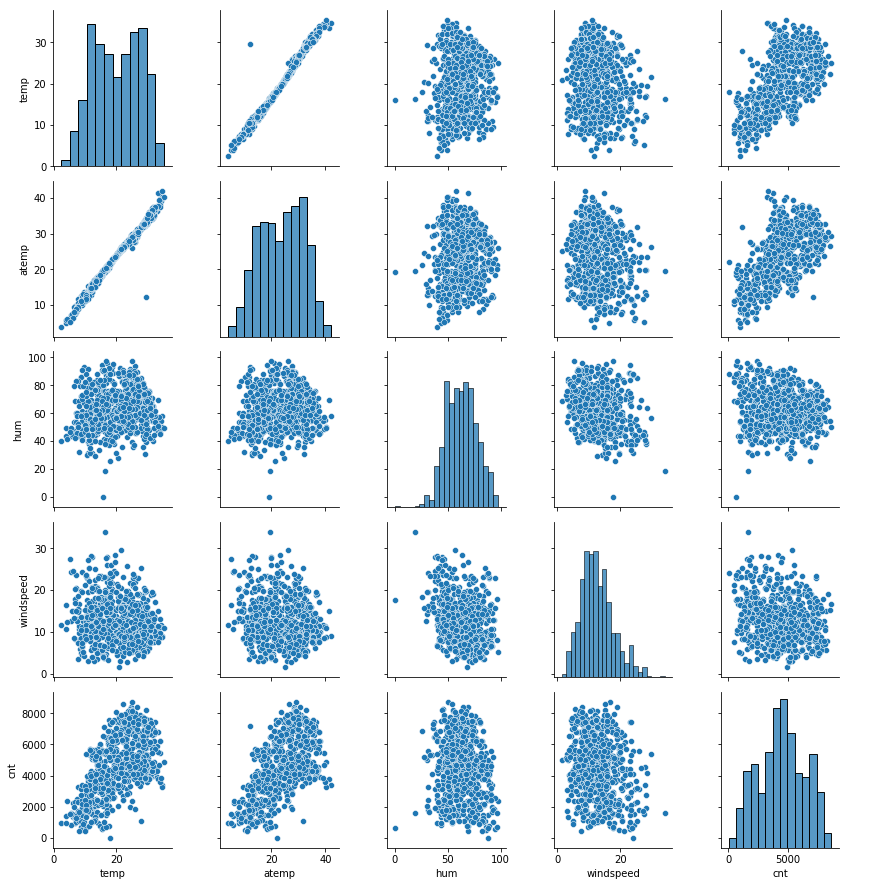

In [7]:
plt.figure(figsize=(12,10))
sns.pairplot(bike_df[['temp','atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

We can see that there are two variables temp and atemp which looks to be linearly related with the target variable cnt. 

The variable atemp and temp are highly correlated. This is quite obivious. 

So we can proceed and build a Linear Model with the given dataset.

## Visualizing Categorical Variables relationship with the Target variable 'cnt'

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

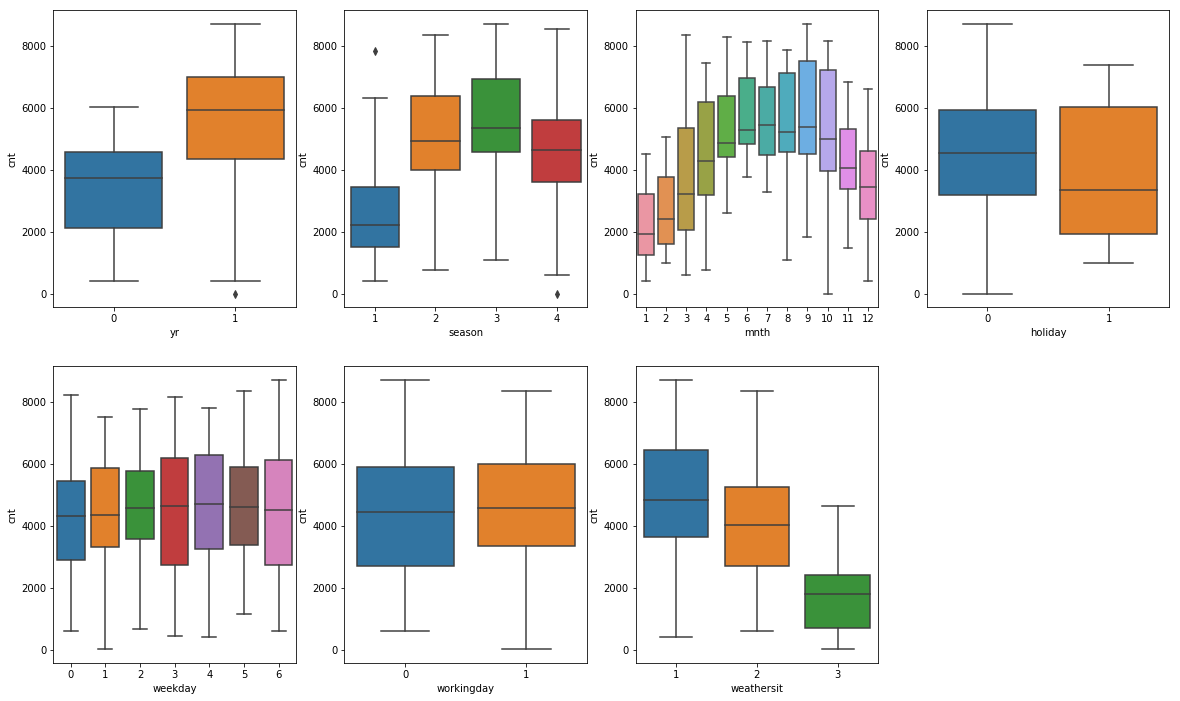

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

From the above BoxPlots, we conclude below analysis:

###### yr and cnt:  
Second year, has more increase in customers count as it's median is on higher side in comparison to the first year.  

###### season and cnt:
Bike sharing is more used in Season 2 and 3. It seems season 2 and 3 have better climate to go out using Bikes. Season 3 has highest number of Bike sharing customers.

###### mnth and cnt: 
month 6-9 has more bike sharing customers in comparison to the other month. It seems people are like using bikes in summers. month 1 and 2 has very low numbers of bike sharing customers. 

###### holiday and cnt:
People are using bikes more when it is not a holiday. So, people are using bike for the work purpose more. 

###### weekday and cnt:
weekday 4 has highest number of bike sharing customers. weekday 0 has lowest number of customers. 

###### workingday and cnt:
working day is inverse to the holiday. If it's working then the number of customers are more. 

###### weathersit and cnt: 
When the weather is Clear, Few clouds, Partly cloudy, Partly cloudy, then there is increase in the customer count. People like going out on bike in clear weather. People don't like using bike when weather has Light Snow, Light Rain, Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

We can also visualize some of these categorical features parallelly by using the hue argument to boxplot. Below is the plot with weekday and cnt with workingday as hue. 

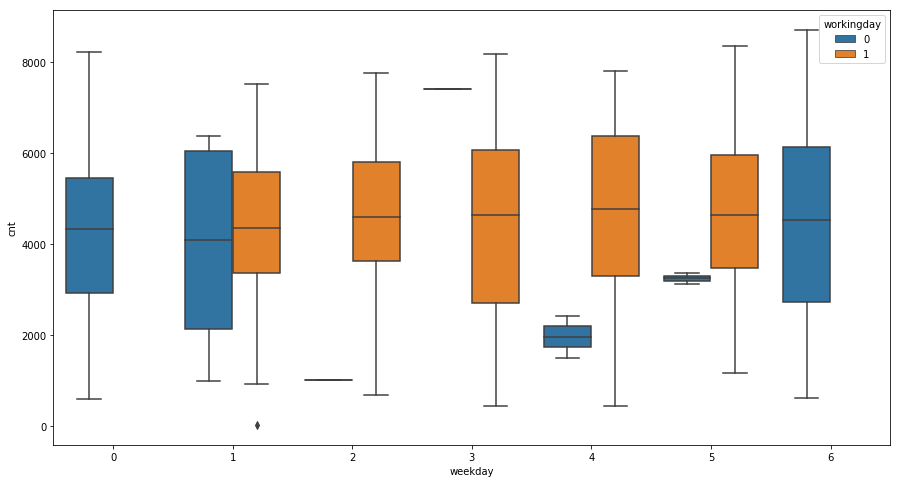

In [9]:
plt.figure(figsize = (15, 8))
sns.boxplot(x='weekday', y='cnt', hue='workingday', data=bike_df)
plt.show()

# Step 2: Data Preparation
You can see in the dataset that, there are many columns which are actually categorical but marked as integer type.

We need to convert their type to category(Categorical)

In [10]:
cat_cols = ['mnth', 'season', 'weekday', 'weathersit']
for col in cat_cols:
    bike_df[col] = pd.Categorical(bike_df[col])
print(bike_df.dtypes)

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object


### Dummy Variables
The variables season, mnth, weekday and weathersit have different levels. We need to convert these levels into integer as well.

For this, we will use dummy variables encoding technique.

In [11]:
dummy_var_cols = pd.get_dummies(bike_df[cat_cols], drop_first = True)
dummy_var_cols.head()

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
bike = pd.concat([bike_df, dummy_var_cols], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [13]:
bike.drop(cat_cols, axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


# Splitting the Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 333)

In [15]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


# Applying MinMaxscaler normalization to the numeric columns. 
First we will apply to the train dataset

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,1,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,1,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing the relationship using correlation matrix and heatmap

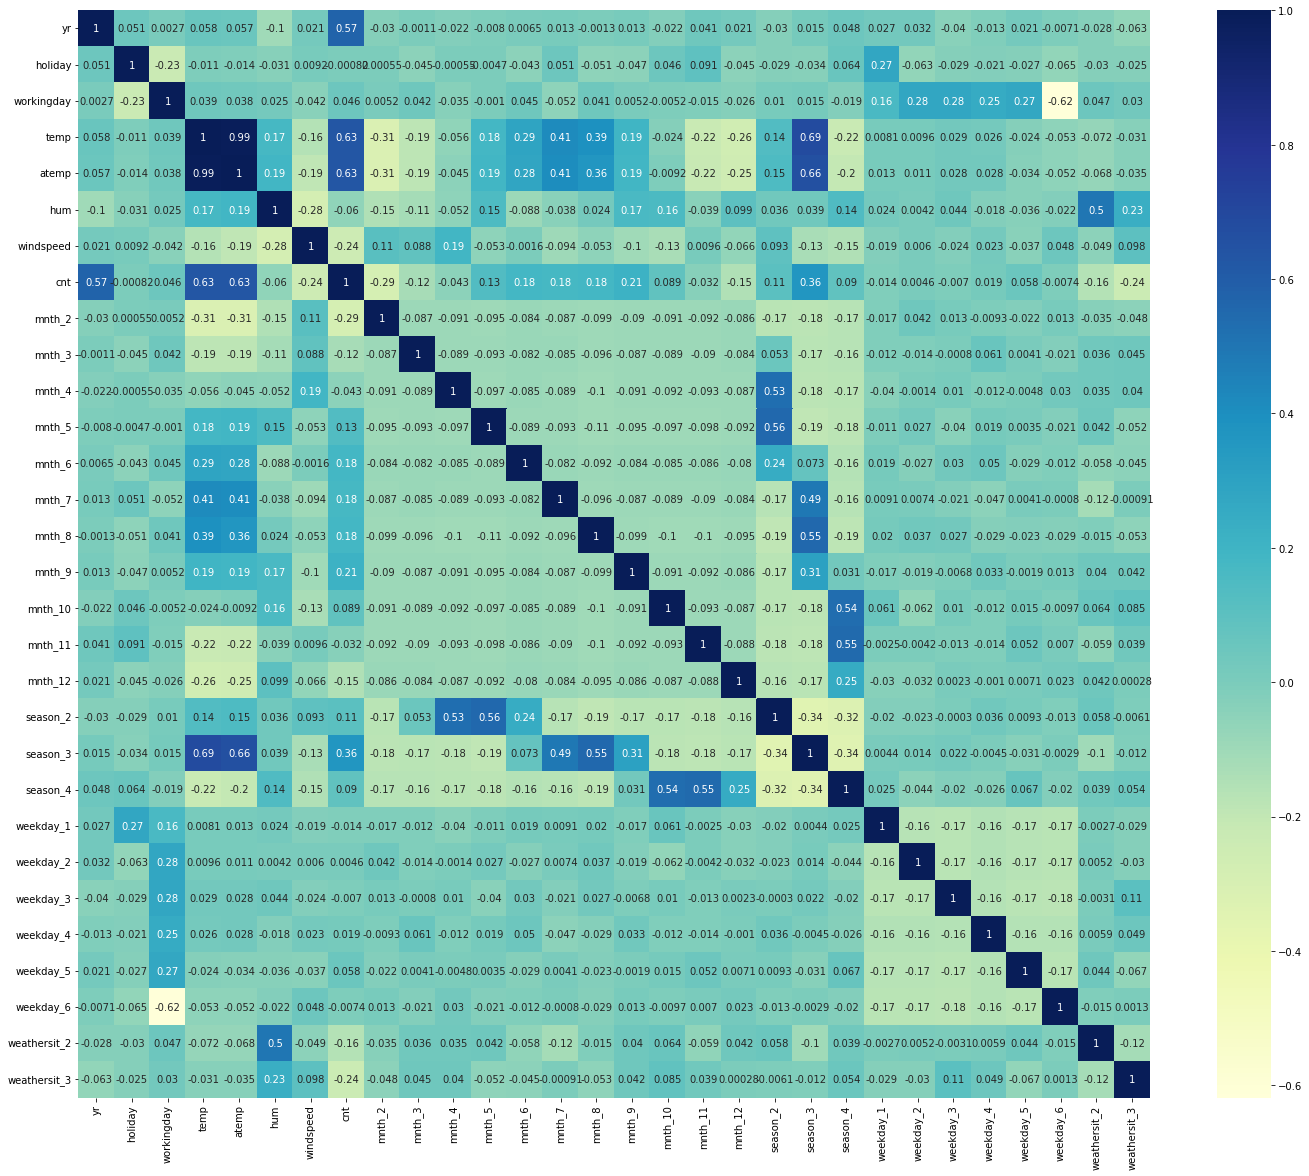

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

The cnt variable is have high positive correlation with temp, atemp and yr. 

cnt has negative correlation with hum and windspeed.

season_3 has high temperature as it is summer.

# Step 3: Model building with Preprocessed Data

## Let's start Linear Regression model first with a independent variable (atemp) which has high linear correation with target variable (cnt)

Let's give try to forward selection approach

We will use use statsmodel to get insight of the model.

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Importing the statsmodel apis to build model

In [21]:
import statsmodels.api as sm

### Adding constant to the the dataset to build linerregression model with statsmodel api

#### calling OLS module fit() to train the linerregression model

In [22]:
X_train_sm = sm.add_constant(X_train[['atemp']])

lr_1 = sm.OLS(y_train, X_train_sm).fit()

#### Get the coefficient of the bulit model lr_1

In [23]:
lr_1.params

const    0.173846
atemp    0.661903
dtype: float64

#### Get the model stats results with help of summary() method.

In [24]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     335.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           7.26e-58
Time:                        20:43:59   Log-Likelihood:                 168.41
No. Observations:                 510   AIC:                            -332.8
Df Residuals:                     508   BIC:                            -324.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1738      0.020      8.616      0.000       0.134       0.213
atemp          0.6619      0.036     18.306      0.000       0.591       0.733
==============================================================================
Omnibus:                        5.685   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.453
Skew:                           0.121   Prob(JB):                        0.108
Kurtosis:                       2.612   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adding another variable
The R-squared value obtained is 0.397. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. yr. 

Not considering temp, as it's coorelation score with temp is very high.

In [25]:
# Assign all the feature variables to X
X_train_sm = sm.add_constant(X_train[['temp', 'yr']])

lr_2 = sm.OLS(y_train, X_train_sm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     542.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.08e-126
Time:                        20:43:59   Log-Likelihood:                 330.99
No. Observations:                 510   AIC:                            -656.0
Df Residuals:                     507   BIC:                            -643.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0771      0.015      5.046      0.000       0.047       0.107
temp           0.5863      0.025     23.730      0.000       0.538       0.635
yr             0.2410      0.011     21.418      0.000       0.219       0.263
==============================================================================
Omnibus:                       37.793   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.040
Skew:                          -0.561   Prob(JB):                     1.84e-12
Kurtosis:                       4.133   Cond. No.                         6.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R_square and Adj R_Square for lr_2 is 0.682 and 0.680 respectively. Which is very good jump from the last R_square of lr_1(0.397). This seems to be pretty good model in itself. 

Model is expaing 68% of variance of target variable and also the p-value of the yr and temp is 0.000. So the input variables are significant. 

Also, Prob (F-statistic) is very low(less than 0.05 and close to zero). This indicates that overall model fit is significant. 

# Adding all the variables to the model

Just to get feel of maximum possible value of R_square

In [26]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()


In [27]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.67e-176
Time:                        20:43:59   Log-Likelihood:                 517.04
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     481   BIC:                            -853.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1947      0.032      6.178   

From the above all variable model, we can conclude that the maximum R-Square value we can get on this training data is 0.846. As we can see there are variables with very high p-value, we should proceed and optimize the model further. 

We will proceed first with automated dropping of the variables using the RFE, then we will manually drop some variables using backward selection technique. 

### RFE

Recursive feature elimination

Lets' use RFE for automated dropping of some of the in-significant variables. Let's consider dropping 10 variables and take 20 forward with RFE model. 

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 15
lr_4 = LinearRegression()
lr_4.fit(X_train, y_train)

rfe = RFE(lr_4, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 9),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 6),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 10),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', False, 8),
 ('weekday_3', False, 2),
 ('weekday_4', False, 3),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

Get the list of First 20 selected variable from the RFE model.

In [31]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'mnth_3', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


Get the list of 10 columns marked for dropping by RFE 

In [32]:
X_train.columns[~rfe.support_]

Index(['holiday', 'windspeed', 'mnth_2', 'mnth_4', 'mnth_8', 'mnth_10',
       'weekday_2', 'weekday_3', 'weekday_4'],
      dtype='object')

## Building model using statsmodel with RFE selected columns, for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.61e-175
Time:                        20:44:00   Log-Likelihood:                 494.42
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     489   BIC:                            -857.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0970      0.026      3.763   

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

# Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

VIF = $ \tfrac{1}{1-R^2} $

**As a general rule of thumb, we will try build linear model which has no independent variable with p-value > 0.03 and VIF > 2.**  

In [36]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# Create a a method to calcuate VIF. 
#I will return a dataframe which will contain the names of all the feature variables and their respective VIFs

def get_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [38]:
# Get the VIF score for the newly built model
vif = get_vif(X_train_rfe)
vif

,Features,VIF
3,temp,57.98
4,atemp,52.15
0,const,38.57
14,season_3,5.95
15,season_4,3.10
13,season_2,2.93
5,hum,1.90
7,mnth_5,1.90
11,mnth_11,1.77
2,workingday,1.76



### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. Some of these variables have high p-value(> 0.03), Let's go ahead and update the model dropping few of the variables.

We would like to have VIF for all the independent variable less than 2. So there are clearly some variables we need to drop.

Let's first drop the vaiable 'atemp', which has one of highest VIF. 

We could drop 'temp' as well, but logically people will first see the temperature of the day. 

Note- I have also build the final model dropping 'temp' variable first as well. I got the best R-square(test and train both) while dropping 'atemp' first. 

In [39]:
# Dropping highly correlated variables

X = X_train_rfe.drop('atemp', 1)

In [40]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     126.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.59e-175
Time:                        20:44:00   Log-Likelihood:                 492.33
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     490   BIC:                            -860.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0942      0.026      3.650   

In [41]:
# Calculate the VIFs again for the new model
vif = get_vif(X)
vif

,Features,VIF
0,const,38.46
13,season_3,5.89
3,temp,4.86
14,season_4,3.09
12,season_2,2.92
6,mnth_5,1.90
4,hum,1.89
10,mnth_11,1.77
2,workingday,1.76
17,weekday_6,1.65


### Dropping the next Variable and Updating the Model

Dropping variable with highest VIF 'season_3' as it's VIF is more than 5.

In [42]:
X = X.drop('season_3', 1)

In [43]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     126.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.72e-171
Time:                        20:44:01   Log-Likelihood:                 480.41
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     491   BIC:                            -842.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0736      0.026      2.828   

In [45]:
# Calculate the VIFs again for the new model
vif = get_vif(X)
vif

,Features,VIF
0,const,37.42
3,temp,2.08
13,season_4,1.91
12,season_2,1.89
4,hum,1.88
6,mnth_5,1.78
2,workingday,1.76
10,mnth_11,1.67
16,weekday_6,1.65
8,mnth_7,1.58


## Dropping the next variable and updating the model

As you might have noticed, dropping atemp and season_3 decreased the VIF of for most of the variable. Now except const, we have all the varaible VIF less than or equal to 2. 

But from the model summary, we can still see some of them have a high p-value. month_6 has highest p-value. Let's drop this column.

In [46]:
X = X.drop('mnth_6', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.32e-172
Time:                        20:44:01   Log-Likelihood:                 480.40
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     492   BIC:                            -848.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0735      0.026      2.830   

In [47]:
# Calculate the VIFs again for the new model
vif = get_vif(X)
vif

,Features,VIF
0,const,37.33
12,season_4,1.90
4,hum,1.86
2,workingday,1.76
11,season_2,1.75
3,temp,1.75
9,mnth_11,1.67
15,weekday_6,1.65
16,weathersit_2,1.57
6,mnth_5,1.56


## Dropping the next variable and updating the model

we can still see some of them have a high p-value. month_7 has highest p-value. Let's drop this column and build a new model.

In [48]:
X = X.drop('mnth_7', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.24e-173
Time:                        20:44:02   Log-Likelihood:                 480.24
No. Observations:                 510   AIC:                            -926.5
Df Residuals:                     493   BIC:                            -854.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0740      0.026      2.852   

## Dropping the next variable and updating the model

#### Now mnth_5 has p-value(>0.03). Let's drop this column and build new model.

In [49]:
X = X.drop('mnth_5', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.74e-174
Time:                        20:44:02   Log-Likelihood:                 479.79
No. Observations:                 510   AIC:                            -927.6
Df Residuals:                     494   BIC:                            -859.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0702      0.026      2.739   

## Dropping the next variable and updating the model

#### Now weekday_5 has p-value(>0.03). Let's drop this column and build new model.

In [50]:
X = X.drop('weekday_5', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.84e-175
Time:                        20:44:02   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -929.0
Df Residuals:                     495   BIC:                            -865.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0711      0.026      2.778   

## Dropping the next variable and updating the model

##### Now mnth_3 has p-value( > 0.03). Let's drop this column and build a new model. 

In [51]:
X = X.drop('mnth_3', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.80e-175
Time:                        20:44:02   Log-Likelihood:                 477.26
No. Observations:                 510   AIC:                            -926.5
Df Residuals:                     496   BIC:                            -867.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0831      0.025      3.324   

## Dropping the next variable and updating the model

##### Now mnth_12 has p-value( > 0.03). Let's drop this column and build a new model. 

In [52]:
X = X.drop('mnth_12', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.82e-176
Time:                        20:44:03   Log-Likelihood:                 475.53
No. Observations:                 510   AIC:                            -925.1
Df Residuals:                     497   BIC:                            -870.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0811      0.025      3.238   

## Dropping the next variable and updating the model

##### Now mnth_11 has p-value( > 0.03). Let's drop this column and build a new model. 

In [53]:
X = X.drop('mnth_11', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.73e-176
Time:                        20:44:03   Log-Likelihood:                 473.71
No. Observations:                 510   AIC:                            -923.4
Df Residuals:                     498   BIC:                            -872.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0761      0.025      3.049   

## Dropping the next variable and updating the model

##### Now weekday_1 has p-value( > 0.03). Let's drop this column and build a new model. 

In [54]:
X = X.drop('weekday_1', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.42e-176
Time:                        20:44:03   Log-Likelihood:                 471.58
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     499   BIC:                            -874.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0754      0.025      3.010   

In [55]:
# Calculate the VIFs again for the new model
vif = get_vif(X)
vif

,Features,VIF
0,const,33.95
4,hum,1.74
2,workingday,1.63
8,weekday_6,1.63
9,weathersit_2,1.54
3,temp,1.24
7,season_4,1.23
6,season_2,1.18
10,weathersit_3,1.17
5,mnth_9,1.11


Now we do not have any independent variable in the model which has **p-value > 0.03**. 

**We have verified that the VIF for all the variable except const is less than 2. This shows there is less collinearity between the independent variables and this is one of the assumptions of Liner Regression.**

From the summary table we can see that R-square (0.816) and (0.813) are quite close to reach other. This indicates that none the the parameters are redundant in our model. There is very less Multicollinearity factor in our model.  

From the summary table we can see that Prob (F-statistic) = 1.42e-176. This value is almost 0. This is indicating that the model is good fit for the train data. 

Based on **p-value, VIF score and Prob (F-statistic)**, We can say that our model **lr_14 is the best model till now**.

Now let's go ahead and start Residual Analysis and model evaluation for the model **lr_14**.




Lets remove const from the train data set, to be used for evaluation process. 

In [56]:
X_train_new = X.drop(['const'], axis=1)

# Step 4: Residual Analysis of the train data

## We will do Residual Analysis by validating the assumptions for the Linear Regession

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_pred = lr_14.predict(X_train_lm)

## Normal Distribution of the Error terms

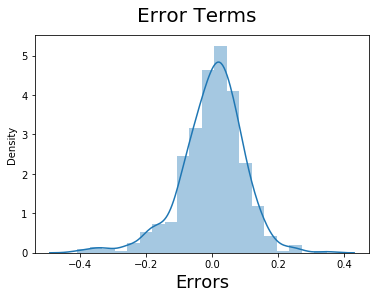

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**From the above ploted graph we can clearly see that the Error terms are normaly distributed and the mean of the graph is almost 0. So, we are passing one of the assumptions of the linear regression.**

### Homoscedasticity (equal variance) of residuals

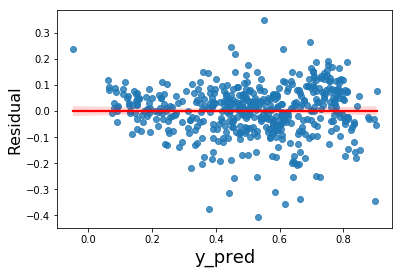

In [59]:
sns.regplot(x=y_train_pred, y=lr_14.resid, line_kws={'color': 'red'})
fig.suptitle('residual vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)
plt.show()

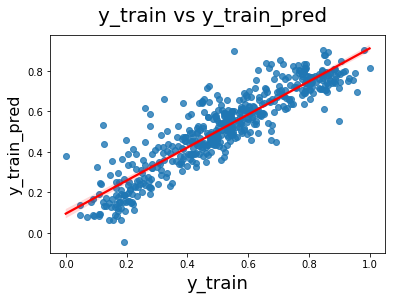

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

**We can see in the above plots that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. Based on both the above inference we can roughly say that there constant variance of error terms.**

### Checking the mean of the residual

In [61]:
lr_14.resid.mean()

6.16391469456104e-16

The mean of the residual is very close to 0. This passed the one of the assumptions of Linear regression that residual mean should be 0

### No autocorrelation of residuals

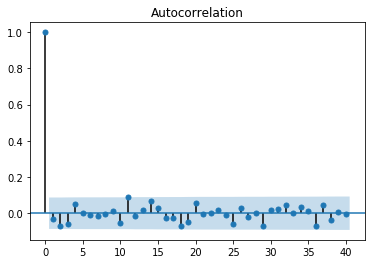

In [62]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lr_14.resid, lags=40 , alpha=0.05)
acf.show()

**Since there is no point outside the significant level of the graph, we can infer that there is no autocorrelation of residuals.** 

## Getting the R-Square value using skLearn as well

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared_train = r2_score(y_train, y_train_pred)
print(r_squared_train)

0.8164990429446204


We are getting the same r-square value as we got from the statsmodel api. 

## Step 5: Model Evaluation and Prediction

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e.  **model(lr_14)**.

Applying the scaling on the test sets

In [64]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.000000,0.000000,0.214684,0.517945,0.060844,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.529437,0.534900,0.311966,0.365150,0.881481,0,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.964569,0.950552,0.415751,0.185998,0.528077,0,0,...,1,0,0,0,0,0,0,0,0,0
504,1,0,0,0.696625,0.666813,0.352259,0.539258,0.839523,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.384393,0.409075,0.447497,0.010221,0.411205,0,0,...,0,1,0,1,0,0,0,0,1,0


### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions
y_pred = lr_14.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

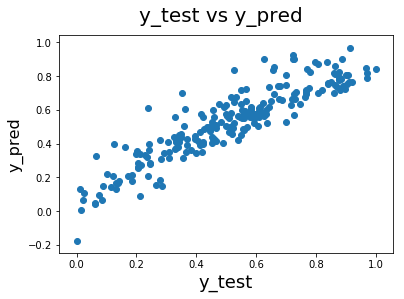

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**The scatter plotting of y_test and y_pred is looks linear. This also paases one of the assuption of constant error terms on the test data as well. **

### Finding R-Square on Test data:

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010736340422897122
r_square_value : 0.8163511349396955


**The R-square value on the test data is 0.816. **

This is explaining that the model is explaing nearly 82% of variance on the test data as well. Which is pretty good result. Also, this value is very close the R-square of the train data. This indicaates that the model is less baised and good fit.** 

Text(0,0.5,'Views')

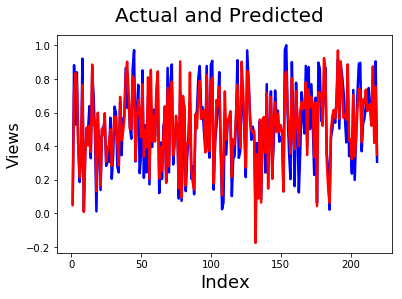

In [71]:

#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

**We can see that the actual and predicted data with test records are almost overlapping. We can infer that model is stable**

Text(0,0.5,'Views_show-Predicted_views')

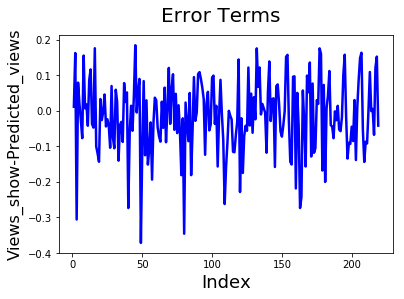

In [72]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

We do not see any pattern in the Error terms plot for test data as well. This indicates that constant variance of error terms on test data as well. 

In [73]:
#Getting the coefficients for the best model
lr_14.params

const           0.075350
yr              0.225079
workingday      0.043816
temp            0.604548
hum            -0.119122
mnth_9          0.105277
season_2        0.081059
season_4        0.146614
weekday_6       0.054996
weathersit_2   -0.052457
weathersit_3   -0.291491
dtype: float64

# Best Linear model build will have below euqation:

$ cnt = 0.07535 * const + 0.225079 * yr + 0.043816 * workingday + 0.604548 * temp - 0.119122 * hum + 0.105277 * mnth\_9 + 0.081059 * season\_2 + 0.146614 * season\_4 + 0.054996 * weekday\_6 - 0.052457 * weathersit\_2 - 0.291491 * weathersit\_3 $
